In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/engineered_features_unprocessed.csv')

In [4]:
X = df[numerical_cols + categorical_cols]
y = df[target_col]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [6]:
onehot_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numerical_cols, onehot_features])

In [7]:
feature_names

array(['age', 'bmi', 'children', 'age_squared', 'age_cubed', 'sqrt_age',
       'log_age', 'is_obese', 'bmi_squared', 'log_bmi', 'age_bmi',
       'smoker_numeric', 'age_smoker', 'age_bmi_smoker', 'is_high_risk',
       'is_young_smoker', 'is_old_smoker', 'has_children',
       'many_children', 'age_per_child', 'children_bmi',
       'region_avg_expense', 'is_northwest', 'smoker_northwest',
       'is_southwest', 'smoker_southwest', 'is_southeast',
       'smoker_southeast', 'is_northeast', 'smoker_northeast',
       'age_premium_factor', 'family_risk', 'smoker_severity', 'sex_male',
       'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Obese',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'age_group_19-25', 'age_group_26-35', 'age_group_36-50',
       'age_group_51-65', 'bmi_risk_tier_Low', 'bmi_risk_tier_Medium',
       'bmi_risk_tier_Very High', 'bmi_risk_tier_Very Low'], dtype=object)

rf

In [8]:
rf_model = RandomForestRegressor(
    n_estimators=250,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=1004
)

In [9]:
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test,  y_pred_rf)
rf_r2 = r2_score(y_test,  y_pred_rf)

In [10]:
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.4f}")

RMSE: 4964.01
MAE: 2865.39
R²: 0.7985


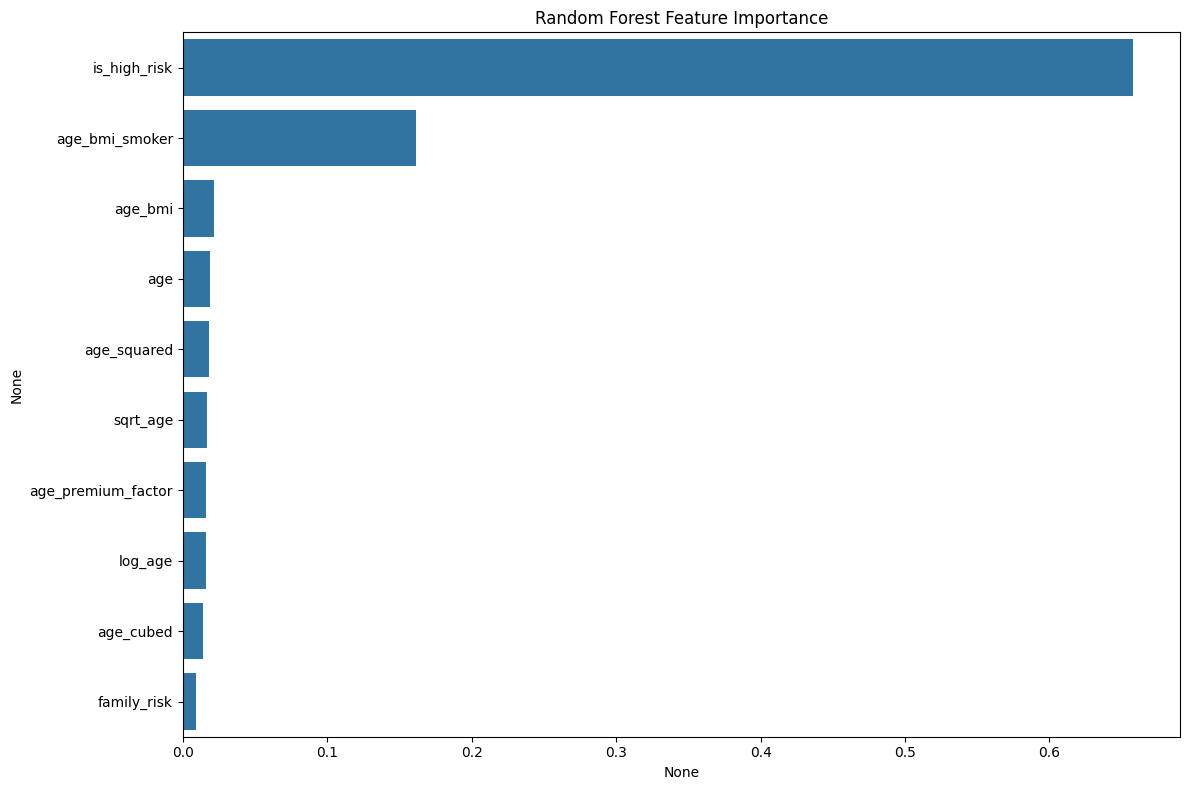

In [11]:
plt.figure(figsize=(12, 8))
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names)
rf_importances = rf_importances.sort_values(ascending=False)
sns.barplot(x=rf_importances[:10], y=rf_importances.index[:10])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [12]:
predictions_df = pd.DataFrame({
    'true_values': y_test.values,
    'rf_predictions': y_pred_rf,
})
predictions_df.to_csv('data/model_predictions.csv', index=False)

In [13]:
joblib.dump(rf_model, 'models/random_forest_model.pkl')

['models/random_forest_model.pkl']